<a href="https://colab.research.google.com/github/victorjoseij/lab-/blob/main/quantitativeRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
%matplotlib inline

In [2]:
data=pd.read_csv('/content/IPL Matches 2008-2020.csv')
data1=pd.read_csv('/content/IPL Ball-by-Ball 2008-2020.csv (2).zip')

In [3]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
data1.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
data.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [6]:
data1.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [7]:
data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [8]:
data1.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

Text(0.5, 1.0, 'Top Ten Cities Used for IPL match')

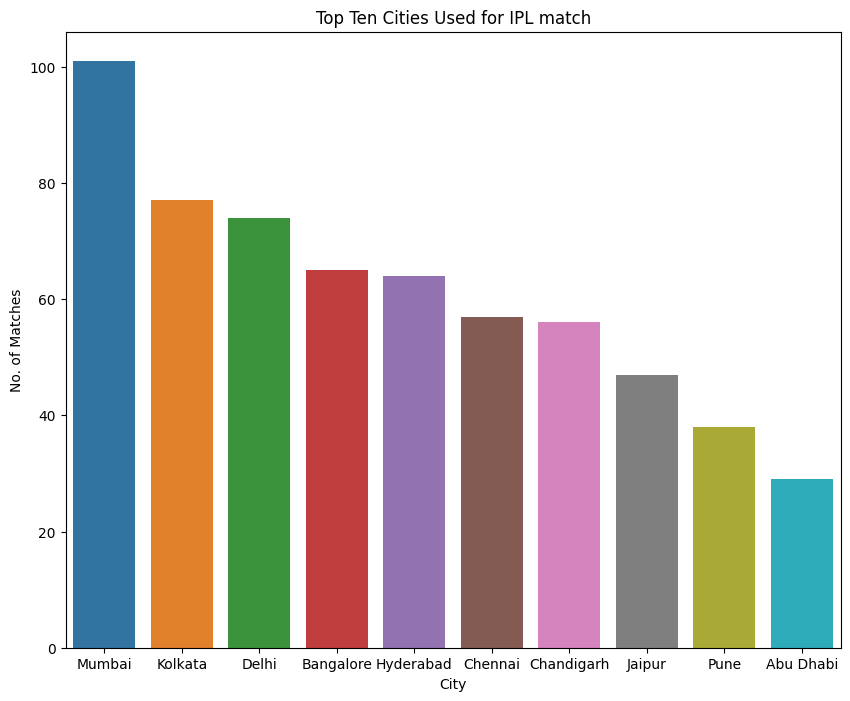

In [9]:
df=data['city'].fillna('')
top_ten_cities=df.value_counts()[:10]
top_ten_labels=top_ten_cities.index
fig, ax = plt.subplots(figsize=(10,8))
g=sns.barplot(x=top_ten_labels,y=top_ten_cities)
g.set_ylabel("No. of Matches")
g.set_xlabel("City")
g.set_title("Top Ten Cities Used for IPL match")

Text(0.5, 1.0, 'Most won Player of the Match')

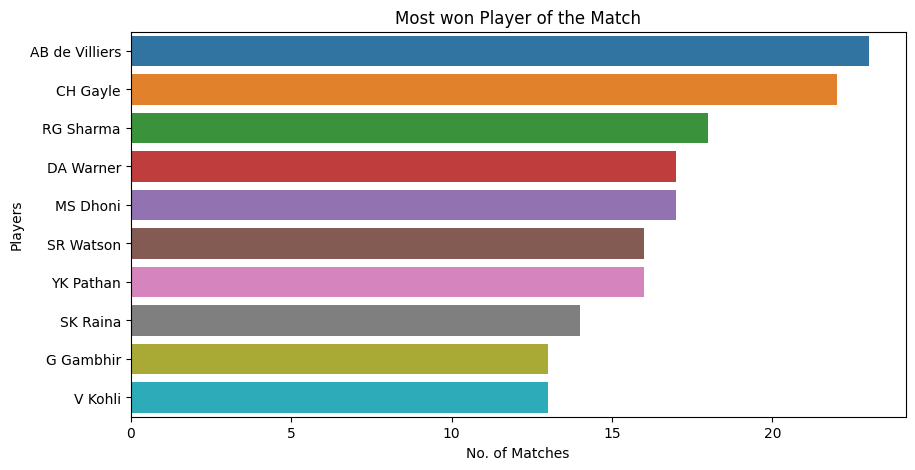

In [11]:
df=data['player_of_match'].fillna('')
top_ten_players=df.value_counts()[:10]
top_ten_labels=top_ten_players.index
fig, ax = plt.subplots(figsize=(10,5))
g=sns.barplot(x=top_ten_players,y=top_ten_labels)
g.set_ylabel("Players")
g.set_xlabel("No. of Matches")
g.set_title("Most won Player of the Match")

Dataset: my data set is totally about the IPL indian premier league(cricket tournament.my dataset contains the ball by ball data of the whole indian premier league tournament (2008-2020)

Inference: I have done data preprocessing for the given dataset and visualized
1)Top 10 cities used for IPL match:
  by barplot it is concluded that most of the ipl matches took place in Mumbai.
2)players with most man of the match:
  by barplot it is concluded that abdevilliers leads the table.